In [1]:
!pip install pandas==2.0.3 numpy==1.25.2 tensorflow==2.16.1 scikit-learn==1.2.2

In [48]:
import keras
import matplotlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils as np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, MaxPooling2D, Conv2D, BatchNormalization, RandomRotation, RandomTranslation, RandomZoom

# Detecção de dígitos MNIST com CNN

## Carregamento da base de dados

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
classes = y_test

In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])),
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])))

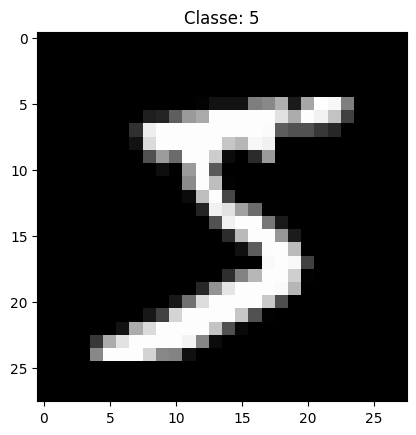

In [7]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Classe: {y_train[0]}')
plt.show();

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # 1 = Quantidade de canais
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) # 1 = Quantidade de canais
x_test = x_test.astype('float32')
x_test /= 255

In [9]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## Definição e treinamento da rede neural

In [54]:
data_augmentation = Sequential([
    RandomRotation(0.2),
    RandomTranslation(0.3, 0.3),
    RandomZoom(0.3, 0.3)
])

In [55]:
rede_neural = Sequential([
    # Entrada
    InputLayer(shape=(28,28,1)),

    # Augmentation
    data_augmentation,

    # Camadas de pré-processamento (convulução, pooling, flattening)
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),

    Flatten(),

    # Rede neural densa
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=10, activation='softmax')
])

In [56]:
rede_neural.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
rede_neural.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_10 (Sequential)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,058 (976.79 KB)

 Trainable params: 249,610 (975.04 KB)

 Non-trainable params: 448 (1.75 KB)

In [58]:
history = rede_neural.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 88s 178ms/step - accuracy: 0.3082 - loss: 1.9679 - val_accuracy: 0.5103 - val_loss: 1.3401
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 174ms/step - accuracy: 0.7175 - loss: 0.8607 - val_accuracy: 0.9101 - val_loss: 0.3103
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 175ms/step - accuracy: 0.7992 - loss: 0.6292 - val_accuracy: 0.8928 - val_loss: 0.3540
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 177ms/step - accuracy: 0.8353 - loss: 0.5290 - val_accuracy: 0.9255 - val_loss: 0.2840
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 174ms/step - accuracy: 0.8558 - loss: 0.4668 - val_accuracy: 0.9411 - val_loss: 0.2020


## Precisão, métricas e gráficos

In [59]:
previsoes = rede_neural.evaluate(x_test, y_test)
previsoes

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9345 - loss: 0.2122


[0.20202450454235077, 0.941100001335144]

In [60]:
previsoes = rede_neural.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [61]:
previsoes_classes = np.argmax(previsoes, axis=1)

In [62]:
accuracy_score(classes, previsoes_classes)

0.9411

In [63]:
confusion_matrix(classes, previsoes_classes)

array([[ 975,    0,    3,    0,    0,    0,    0,    1,    1,    0],
       [   4, 1068,    4,    4,    3,    2,   14,    9,   25,    2],
       [   3,    0, 1014,    1,    1,    1,    0,    6,    6,    0],
       [   4,    0,   23,  951,    0,   11,    0,   10,   11,    0],
       [   1,    0,   11,    2,  916,    1,    2,   17,   23,    9],
       [   9,    1,    3,    5,    0,  835,   25,    3,    9,    2],
       [   7,    1,    1,    0,    2,    6,  939,    0,    2,    0],
       [   0,    7,  144,    7,    4,    0,    0,  866,    0,    0],
       [   4,    0,   17,    1,    3,    2,    5,    0,  941,    1],
       [  23,    0,    3,    2,   16,    7,    0,   17,   35,  906]])

In [64]:
print(classification_report(classes, previsoes_classes))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      0.94      0.97      1135
           2       0.83      0.98      0.90      1032
           3       0.98      0.94      0.96      1010
           4       0.97      0.93      0.95       982
           5       0.97      0.94      0.95       892
           6       0.95      0.98      0.97       958
           7       0.93      0.84      0.89      1028
           8       0.89      0.97      0.93       974
           9       0.98      0.90      0.94      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [65]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc)+1)

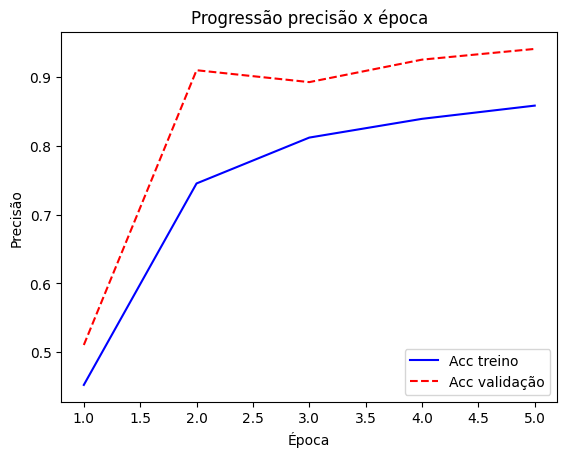

In [66]:
plt.plot(epochs, train_acc, 'b', label='Acc treino')
plt.plot(epochs, val_acc, 'r--', label='Acc validação')
plt.title('Progressão precisão x época')
plt.xlabel('Época')
plt.ylabel('Precisão')
plt.legend()
plt.show();

## Salvamento do classificador

In [67]:
rede_neural.save('CNN_MNIST_aug.keras')